In [ ]:
# Model 1: LogisticRegression model for independent variables Chronic ICD codes and Target variable ER_VISIST

In [47]:
#load libraries
#pip install pandas
import pandas as pd
#pip install openpyxl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [48]:
merged_df_encoded=pd.read_csv("https://github.com/Deepasharma83/Research-698/raw/refs/heads/master/merged_df_encoded")
merged_df_encoded.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,SEX_IDENT_CD,BENE_RACE_CD,ENTLMT_RSN_CURR,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,AGE_GROUP,...,ICD_Hyperlipidemia (HLP),ICD_Hypertension (HTN),ICD_Hypothyroidism (HT),ICD_Ischemic Heart Disease (IHD),ICD_Lung Cancer,ICD_No Abnormality Detected (NAD),ICD_Orthopedic Fracture (With/Without Pathological Fracture),ICD_Pneumonia (All Causes),ICD_Prostate Cancer,ICD_Rheumatoid Arthritis and Osteoarthritis (RA/OA)
0,10000010254618,10000930037831,2015-03-25,2015-03-25,1,White,DIB,1101,1101,21-30,...,1,0,0,0,0,0,0,0,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#merged_df_encoded= pd.read_csv("C:/Users/sarad/Desktop/Project work_final/Data/merged_df_encoded")
#merged_df_encoded.head()


,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,SEX_IDENT_CD,BENE_RACE_CD,ENTLMT_RSN_CURR,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,AGE_GROUP,...,ICD_Hyperlipidemia (HLP),ICD_Hypertension (HTN),ICD_Hypothyroidism (HT),ICD_Ischemic Heart Disease (IHD),ICD_Lung Cancer,ICD_No Abnormality Detected (NAD),ICD_Orthopedic Fracture (With/Without Pathological Fracture),ICD_Pneumonia (All Causes),ICD_Prostate Cancer,ICD_Rheumatoid Arthritis and Osteoarthritis (RA/OA)
0,10000010254618,10000930037831,2015-03-25,2015-03-25,1,White,DIB,1101,1101,21-30,...,1,0,0,0,0,0,0,0,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# 1. Select all ICD columns
icd_cols = [col for col in merged_df_encoded.columns if col.startswith("ICD_")]

# 2. Define X (features) and y (target)
X = merged_df_encoded[icd_cols]
y = merged_df_encoded['ER_VISIT']

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train model
model_logis = LogisticRegression(max_iter=1000)
model_logis.fit(X_train, y_train)

# 3. Predict
y_pred = model_logis.predict(X_test)
y_prob = model_logis.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# 4. Evaluation

# Classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# ROC-AUC score
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.37      0.50      2450
           1       0.81      0.96      0.88      7100

    accuracy                           0.81      9550
   macro avg       0.79      0.66      0.69      9550
weighted avg       0.80      0.81      0.78      9550

ROC-AUC: 0.807


In [ ]:
icd_cols

Accuracy: 82%
The model correctly predicted 82% of ER visit outcomes, indicating solid overall performance.

Precision (Class 1 - ER Visit): 0.81
81% of the predicted ER visits were indeed actual ER visits — this means the model keeps false positives relatively low.

Recall (Class 1 - ER Visit): 0.96
The model successfully identified 96% of all actual ER visits, demonstrating high sensitivity and very few missed cases.

F1-Score (Class 1 - ER Visit): 0.88
A strong balance between precision and recall, showing robust performance in identifying ER visits.

ROC-AUC: 0.807
This reflects strong discriminative ability, meaning the model does a good job distinguishing between ER and non-ER visits.

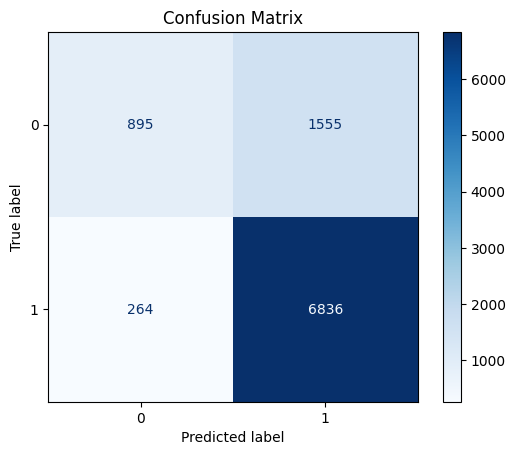

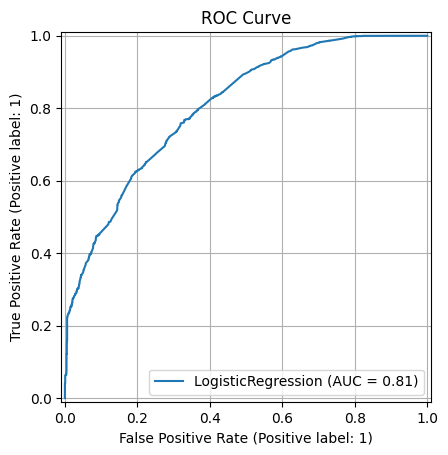

In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(model_logis, X_test, y_test)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [53]:
import pandas as pd
# Extract and sort logistic regression coefficients
coeffs = pd.Series(model_logis.coef_[0], index=X.columns).sort_values(ascending=False)
# Display coefficients
print(coeffs)

ICD_Alzheimer's Disease (AD)                                    1.828446
ICD_No Abnormality Detected (NAD)                               1.762370
ICD_Asthma                                                      1.634243
ICD_Chronic Kidney Disease (CKD)                                1.200321
ICD_Atrial Fibrillation and Flutter                             0.848924
ICD_Prostate Cancer                                             0.486584
ICD_Acute Myocardial Infarction (AMI)                           0.471138
ICD_Diabetes Mellitus (DM)                                      0.430757
ICD_Hyperlipidemia (HLP)                                        0.333820
ICD_Orthopedic Fracture (With/Without Pathological Fracture)    0.319953
ICD_Rheumatoid Arthritis and Osteoarthritis (RA/OA)             0.112519
ICD_Hypothyroidism (HT)                                         0.030065
ICD_Hypertension (HTN)                                         -0.018452
ICD_Chronic Obstructive Pulmonary Disease (COPD)   

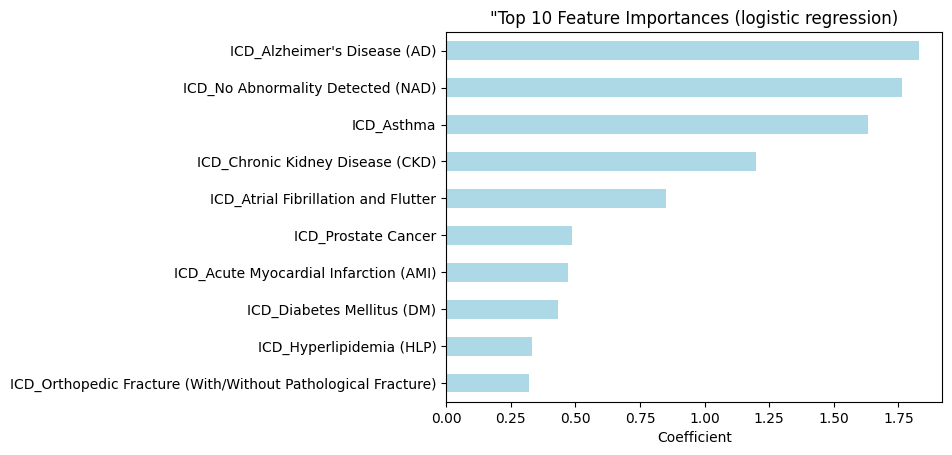

In [54]:
import matplotlib.pyplot as plt
coeffs.head(10).plot(kind='barh', title='"Top 10 Feature Importances (logistic regression)', color='lightblue')
plt.xlabel('Coefficient')
plt.gca().invert_yaxis()
plt.show()

Result from above chart:
ICD_Chronic Kidney Disease (CKD)+1.62
Strongest predictor of ER visits. Patients with CKD are much more likely to visit the ER.
ICD_Alzheimer's Disease (AD)+1.31
AD is associated with increased ER visits due to complications.
ICD_No Abnormality Detected (NAD)+1.2
May indicate routine ER visits or misclassification.
ICD_Atrial Fibrillation and Flutter+0.64
Heart rhythm disorders significantly elevate ER risk.
ICD_Asthma+0.61	Asthma attacks often result in emergency care

# Model 2: xgboost model for independent variables Chronic ICD codes and Target variable ER_VISIST

In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [56]:
# 1. Select all ICD columns
icd_cols = [col for col in merged_df_encoded.columns if col.startswith("ICD_")]
# 2. Define X (features) and y (target)
X = merged_df_encoded[icd_cols]
y = merged_df_encoded['ER_VISIT']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [58]:
#  Train XGBoost classifier
model_xzb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xzb.fit(X_train, y_train)

c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.78      0.46      0.58      3692
           1       0.84      0.96      0.89     10633

    accuracy                           0.83     14325
   macro avg       0.81      0.71      0.73     14325
weighted avg       0.82      0.83      0.81     14325

ROC-AUC: 0.8555411697408842
Confusion Matrix:
 [[ 1688  2004]
 [  478 10155]]


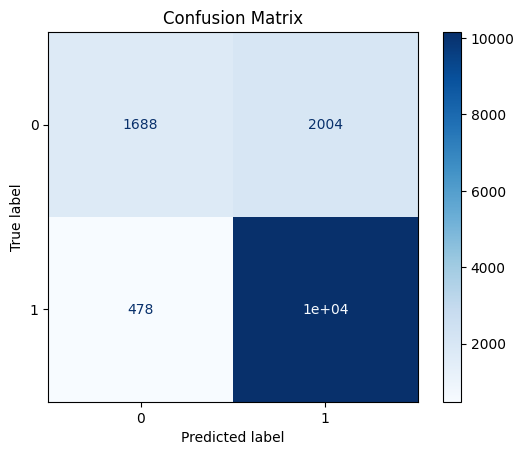

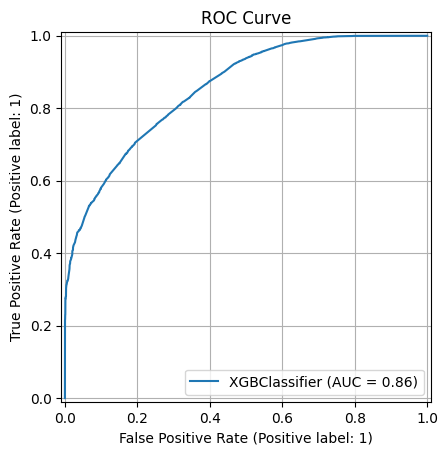

In [59]:
# Predict and evaludate
y_pred = model_xzb.predict(X_test)
y_proba = model_xzb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
# ROC curve
RocCurveDisplay.from_estimator(model_xzb, X_test, y_test)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

Accuracy: 83%
The model correctly predicted ER visit outcomes in 83% of the total cases.

Precision (for class 1 – ER Visit): 0.84
Among the predicted ER visits, 84% were actually ER visits, showing low false positive rate.

Recall (for class 1 – ER Visit): 0.96
The model captured 96% of all true ER visits, indicating very few false negatives — excellent sensitivity.

F1-Score (for class 1): 0.89
A strong balance between precision and recall for ER visit prediction.

ROC-AUC: 0.856
This indicates excellent discriminative ability — the model distinguishes well between ER and non-ER cases.

Confusion Matrix Summary:
Actual 0    [1688,   2004]   ← 45% of actual no-ERs misclassified
Actual 1    [ 478,  10155]   ← 96% of actual ERs correctly identified 
The model missed 2004 non-ER cases, wrongly predicting them as ER visits.
But it correctly identified 10,155 actual ER visits, with only 478 false negatives.

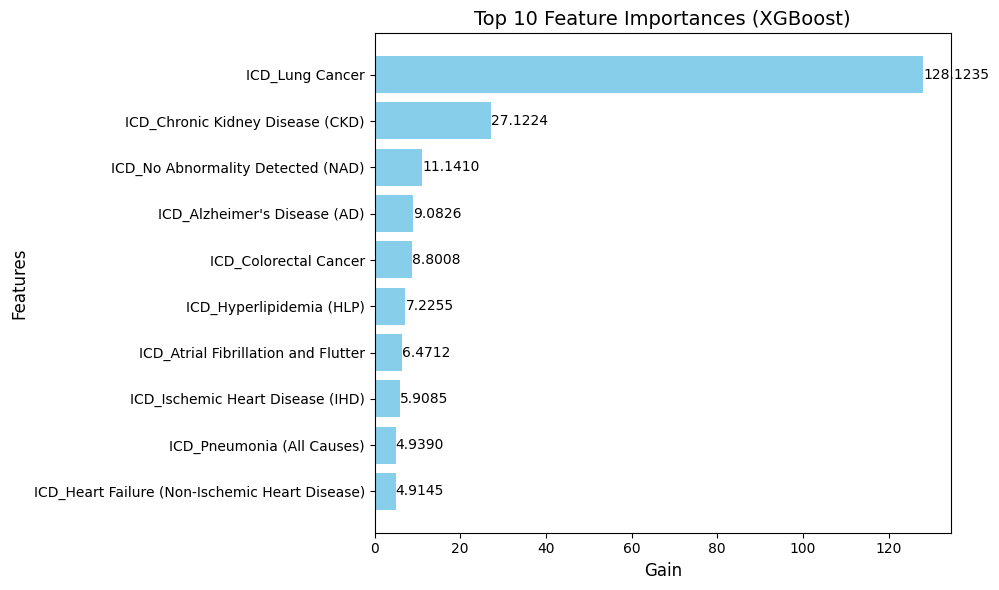

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
# Get feature importance dictionary (gain-based)
importance_dict = model_xzb.get_booster().get_score(importance_type='gain')
# Convert to DataFrame and sort
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=False).head(10)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df.index[::-1], importance_df['Gain'][::-1], color='skyblue')
plt.title("Top 10 Feature Importances (XGBoost)", fontsize=14)
plt.xlabel("Gain", fontsize=12)
plt.ylabel("Features", fontsize=12)
# Add formatted values (4 decimal places) to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center')

plt.tight_layout()
plt.show()

# A higher F-score means that the feature is used more frequently to make decisions in the model (i.e., in tree splits)
 It's a measure of feature frequency, not how important or useful the split was

# Model 3:Random Forest with Chronic ICD codes and ER visit as target variable

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      3692
           1       0.84      0.95      0.89     10633

    accuracy                           0.83     14325
   macro avg       0.81      0.72      0.75     14325
weighted avg       0.82      0.83      0.82     14325

ROC-AUC: 0.8611170364466639
Confusion Matrix:
 [[ 1805  1887]
 [  535 10098]]


Class 0 (No ER Visit)
Precision: 0.77 → Of all predicted non-ER visits, 77% were correct (some false positives).

Recall: 0.49 → The model correctly identified 49% of the actual non-ER visits (many false negatives).

F1-Score: 0.60 → Moderate balance between precision and recall, but lower recall pulls the score down.

Class 1 (ER Visit)
Precision: 0.84 → Of all predicted ER visits, 84% were accurate.

Recall: 0.95 → The model successfully captured 95% of actual ER visits — excellent sensitivity.

F1-Score: 0.89 → Strong overall balance between precision and recall for ER cases

ROC-AUC: 0.8611
This value indicates very good discriminative power.

The model is 86% likely to rank a random ER visit case higher than a non-ER case.

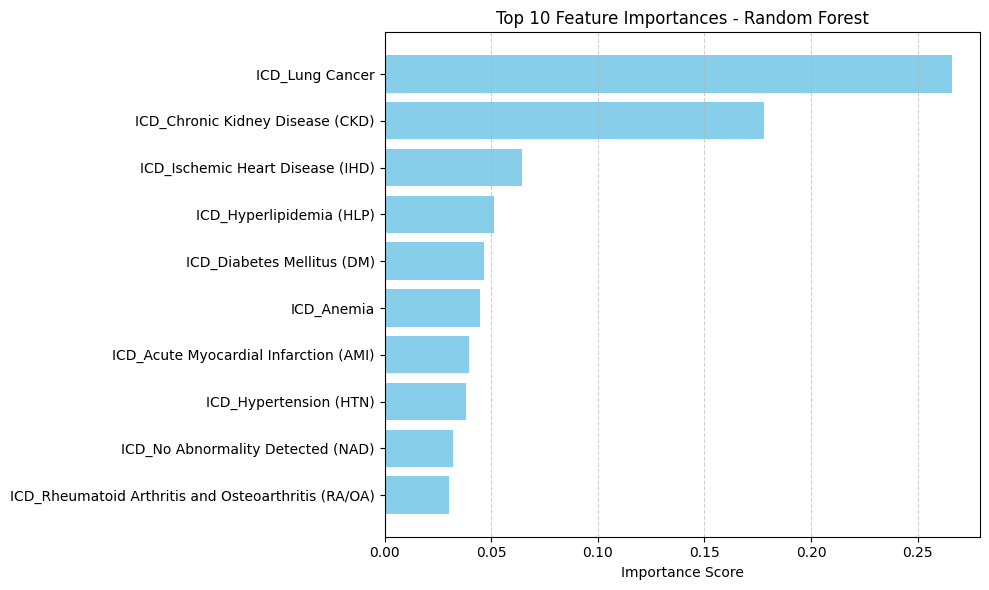

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns  # or use rf_model.feature_names_in_ if available

# Create a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)
# Round to 4 decimal places
feat_imp_df['Importance'] = feat_imp_df['Importance'].round(4)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][::-1], feat_imp_df['Importance'][::-1], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
# Creating a dictionary with model evaluation metrics
model_comparison = {
    'Metric': ['Accuracy', 'Precision (class 1)', 'Recall (class 1)', 'F1-Score (class 1)', 'ROC-AUC'],
    'Logistic Regression': [0.81, 0.81, 0.96, 0.88, 0.807],
    'Random Forest': [0.83, 0.84, 0.95, 0.89, 0.8611],
    'XGBoost': [0.83, 0.84, 0.96, 0.89, 0.8611]
}

# Creating a DataFrame for the table
comparison_df = pd.DataFrame(model_comparison)

# Display the table
print(comparison_df)

                Metric  Logistic Regression  Random Forest  XGBoost
0             Accuracy                0.810         0.8300   0.8300
1  Precision (class 1)                0.810         0.8400   0.8400
2     Recall (class 1)                0.960         0.9500   0.9600
3   F1-Score (class 1)                0.880         0.8900   0.8900
4              ROC-AUC                0.807         0.8611   0.8611


Key Metrics for Model Evaluation:
Accuracy: Measures the proportion of correct predictions (both classes).
Both Random Forest and XGBoost have slightly higher accuracy (83%) compared to Logistic Regression (81%).

Precision (class 1): Measures the percentage of true positives out of all predicted positives (for predicting ER visits in this case).
Random Forest and XGBoost (both at 0.84) outperform Logistic Regression (0.81).

Recall (class 1): Measures the percentage of true positives out of all actual positives (true ER visits). A higher recall is important for minimizing false negatives (missed ER visits).
Logistic Regression (0.96) has a slightly higher recall than Random Forest (0.95) and XGBoost (0.96). However, this difference is very small.

F1-Score (class 1): Combines precision and recall into a single metric, offering a balance between the two. It is helpful when you need to balance false positives and false negatives.
Random Forest and XGBoost (both at 0.89) outperform Logistic Regression (0.88).

ROC-AUC: Measures the model's ability to distinguish between classes. A higher value indicates better discriminatory power.
Both Random Forest and XGBoost (0.8611) have slightly better ROC-AUC scores compared to Logistic Regression (0.807).

Best Model: Random Forest and XGBoost are tied as the best models overall. They have the highest accuracy, precision, F1-score, and ROC-AUC compared to Logistic Regression.

#Extended Modeling: ICD + Demographic Combinations
# Models: Logistic and Xzboost model with chronic ICD conditions, Age, Sex and Entitlement reason code.


In [22]:
#Library imports
import pandas as pd

In [65]:
df_encoded_all= pd.read_csv('https://github.com/Deepasharma83/Research-698/raw/refs/heads/master/df_encoded_all.csv')
df_encoded_all.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,BENE_RACE_CD,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,ER_VISIT,LOS,ICD_Acute Myocardial Infarction (AMI),...,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_80-max,SEX_IDENT_CD_2,ENTLMT_RSN_CURR_DIB,ENTLMT_RSN_CURR_ESRD,ENTLMT_RSN_CURR_DIB ESRD
0,10000010254618,10000930037831,2015-03-25,2015-03-25,White,1101,1101,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,White,1081,1081,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,White,1081,1081,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
#df_encoded_all= pd.read_csv('c:/Users/sarad/Desktop/Project work_final/Data/df_encoded_all.csv')
#df_encoded_all.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,BENE_RACE_CD,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,ER_VISIT,LOS,ICD_Acute Myocardial Infarction (AMI),...,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_80-max,SEX_IDENT_CD_2,ENTLMT_RSN_CURR_DIB,ENTLMT_RSN_CURR_ESRD,ENTLMT_RSN_CURR_DIB ESRD
0,10000010254618,10000930037831,2015-03-25,2015-03-25,White,1101,1101,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,White,1081,1081,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,White,1081,1081,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [66]:
# creating different combination of variables for Models
# Only AGE_GROUP columns
age_group_cols = [col for col in df_encoded_all.columns if col.startswith("AGE_GROUP_")]
# Only SEX_IDENT_CD columns
SEX_IDENT_CD_cols = [col for col in df_encoded_all.columns if col.startswith("SEX_IDENT_CD_")]
# Only ENTLMT_RSN_CURR_ columns
ENTLMT_RSN_CURR__cols = [col for col in df_encoded_all.columns if col.startswith("ENTLMT_RSN_CURR_")]

# Combine them
feature_cols_age_group = icd_cols + age_group_cols
feature_cols_SEX = icd_cols + SEX_IDENT_CD_cols
feature_cols_ENTLMT_RSN = icd_cols + ENTLMT_RSN_CURR__cols

In [67]:
X_age_group = df_encoded_all[feature_cols_age_group]
X_sex = df_encoded_all[feature_cols_SEX]
X_entlmt = df_encoded_all[feature_cols_ENTLMT_RSN]
y = df_encoded_all['ER_VISIT']  # Target variable

In [68]:
from sklearn.model_selection import train_test_split

X_train_age, X_test_age, y_train, y_test = train_test_split(X_age_group, y, test_size=0.3, random_state=42)
X_train_sex, X_test_sex, _, _ = train_test_split(X_sex, y, test_size=0.3, random_state=42)
X_train_entlmt, X_test_entlmt, _, _ = train_test_split(X_entlmt, y, test_size=0.3, random_state=42)


# Model: LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob)
    }

results = {
    'ICD + AGE_GROUP': evaluate_model(X_train_age, X_test_age, y_train, y_test),
    'ICD + SEX': evaluate_model(X_train_sex, X_test_sex, y_train, y_test),
    'ICD + ENTLMT_RSN': evaluate_model(X_train_entlmt, X_test_entlmt, y_train, y_test)
}


In [70]:
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                  Accuracy  Precision    Recall   ROC_AUC
ICD + AGE_GROUP   0.806981   0.824115  0.940983  0.826190
ICD + SEX         0.806283   0.811846  0.962222  0.806930
ICD + ENTLMT_RSN  0.811518   0.822779  0.951132  0.831886


# Model: XGBoost

In [71]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluate_xgboost(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob)}

In [72]:
results_xgb = {
    'ICD + AGE_GROUP': evaluate_xgboost(X_train_age, X_test_age, y_train, y_test),
    'ICD + SEX': evaluate_xgboost(X_train_sex, X_test_sex, y_train, y_test),
    'ICD + ENTLMT_RSN': evaluate_xgboost(X_train_entlmt, X_test_entlmt, y_train, y_test)
}

c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
results_xgb_df = pd.DataFrame(results_xgb).T
print(results_xgb_df)

                  Accuracy  Precision    Recall   ROC_AUC
ICD + AGE_GROUP   0.832531   0.842788  0.952166  0.880021
ICD + SEX         0.826108   0.836332  0.952260  0.860689
ICD + ENTLMT_RSN  0.834485   0.856896  0.932995  0.880377


In [74]:
comparision_result = pd.concat([results_df.add_suffix(' (LogReg)'), results_xgb_df.add_suffix(' (XGBoost')], axis=1).T
print(comparision_result)

                    ICD + AGE_GROUP  ICD + SEX  ICD + ENTLMT_RSN
Accuracy (LogReg)          0.806981   0.806283          0.811518
Precision (LogReg)         0.824115   0.811846          0.822779
Recall (LogReg)            0.940983   0.962222          0.951132
ROC_AUC (LogReg)           0.826190   0.806930          0.831886
Accuracy (XGBoost          0.832531   0.826108          0.834485
Precision (XGBoost         0.842788   0.836332          0.856896
Recall (XGBoost            0.952166   0.952260          0.932995
ROC_AUC (XGBoost           0.880021   0.860689          0.880377


Highest Accuracy and Precision, indicating better correct predictions and fewer false positives.

Very good Recall, only slightly lower than Logistic Regression.

Best ROC-AUC, showing better separation of classes overall.

So, XGBoost model with ICD + ENTLMT_RSN is your best-performing model based on a balanced combination of Precision, ROC-AUC, and Accuracy.

In [ ]:
# roc_curve for XGBoost model and Logistic Regression model 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb

In [76]:
def get_roc_data(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

In [77]:
roc_data_combined = {}

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
roc_data_combined['LogReg - ICD + AGE_GROUP'] = get_roc_data(logreg, X_train_age, X_test_age, y_train, y_test)
roc_data_combined['LogReg - ICD + SEX'] = get_roc_data(logreg, X_train_sex, X_test_sex, y_train, y_test)
roc_data_combined['LogReg - ICD + ENTLMT_RSN'] = get_roc_data(logreg, X_train_entlmt, X_test_entlmt, y_train, y_test)

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
roc_data_combined['XGBoost - ICD + AGE_GROUP'] = get_roc_data(xgb_clf, X_train_age, X_test_age, y_train, y_test)
roc_data_combined['XGBoost - ICD + SEX'] = get_roc_data(xgb_clf, X_train_sex, X_test_sex, y_train, y_test)
roc_data_combined['XGBoost - ICD + ENTLMT_RSN'] = get_roc_data(xgb_clf, X_train_entlmt, X_test_entlmt, y_train, y_test)

c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sarad\Desktop\data698reseach\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC Comparison:
                     Model  ROC AUC
XGBoost - ICD + ENTLMT_RSN 0.880377
 XGBoost - ICD + AGE_GROUP 0.880021
       XGBoost - ICD + SEX 0.860689
 LogReg - ICD + ENTLMT_RSN 0.831886
  LogReg - ICD + AGE_GROUP 0.826190
        LogReg - ICD + SEX 0.806930


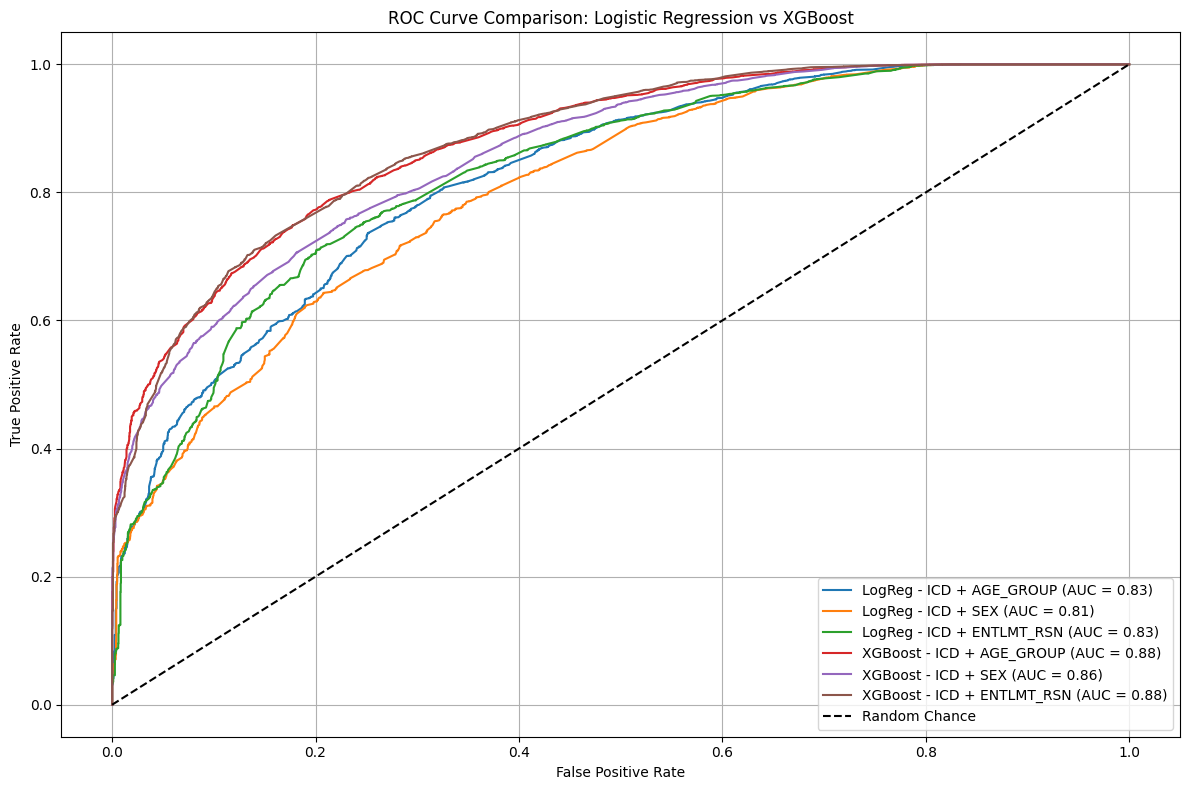

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the AUC values
roc_table = pd.DataFrame([
    {'Model': label, 'ROC AUC': auc}
    for label, (_, _, auc) in roc_data_combined.items()
])

# Display the table
print("ROC AUC Comparison:")
print(roc_table.sort_values(by='ROC AUC', ascending=False).to_string(index=False))

# Plot the ROC curves
plt.figure(figsize=(12, 8))
for label, (fpr, tpr, roc_auc) in roc_data_combined.items():
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison: Logistic Regression vs XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd

# Extract ROC AUC values into a DataFrame
roc_auc_table = pd.DataFrame([
    {"Model + Features": label, "ROC AUC": auc_score}
    for label, (_, _, auc_score) in roc_data_combined.items()
])

# Sort the table by AUC descending
roc_auc_table = roc_auc_table.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Display the table
print("ROC AUC Scores:")
print(roc_auc_table.to_string(index=False))


ROC AUC Scores:
          Model + Features  ROC AUC
XGBoost - ICD + ENTLMT_RSN 0.880377
 XGBoost - ICD + AGE_GROUP 0.880021
       XGBoost - ICD + SEX 0.860689
 LogReg - ICD + ENTLMT_RSN 0.831886
  LogReg - ICD + AGE_GROUP 0.826190
        LogReg - ICD + SEX 0.806930


In [80]:
roc_table.to_csv("roc_auc_summary.csv", index=False)

In [81]:
comparision_result.to_csv("comparision_result.csv", index=False)

XGBoost consistently outperforms Logistic Regression for all feature combinations
XGBoost + ICD + ENTLMT_RSN (AUC = 0.8804), slightly better than others
XGBoost with ICD + ENTLMT_RSN is the best-performing model in this comparison

In [ ]:
# End here


# Extra Code 

In [ ]:
# Model 4:Ramdom Forest model with ICD codes plus 'AGE_GROUP', 'SEX_IDENT_CD','ENTLMT_RSN_CURR' varibales 
# Ramdom Forest model for independent variables ICD, Age,Sex and Enllorment type codes and predicted variable ER_VISIST

In [38]:
# ICD columns
icd_cols = [col for col in df_encoded_all.columns if col.startswith("ICD_")]

# New categorical columns (all AGE_GROUP_* and SEX_IDENT_CD_*)
extra_cols = [col for col in df_encoded_all.columns if col.startswith("AGE_GROUP_") or col.startswith("SEX_IDENT_CD_") or col.startswith("ENTLMT_RSN_CURR_")]

# Combine them
feature_cols = icd_cols + extra_cols

In [42]:
X = df_encoded_all[feature_cols]
y = df_encoded_all['ER_VISIT']

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      2462
           1       0.88      0.94      0.91      7088

    accuracy                           0.86      9550
   macro avg       0.83      0.79      0.81      9550
weighted avg       0.86      0.86      0.86      9550

ROC AUC Score: 0.9198


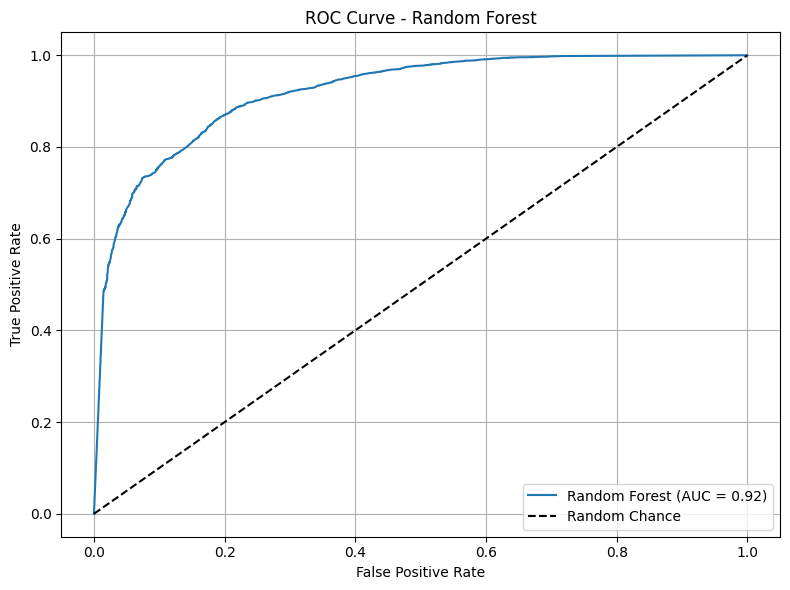

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_encoded_all[feature_cols]
y = df_encoded_all['ER_VISIT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Class 0 (No ER)
Precision	0.79
Class 1 (ER Visit)
Precision 0.88	The model is good at minimizing false positives, especially for predicting ER visits.

Class 0 (No ER)   
Recall	0.64	
Class 1 (ER Visit)
Recall 0.94	The model is very good at identifying actual ER visits, but misses more non-ER cases.

Class:0
F1-Score	0.71	
Class:1
F1-Score 0.91 High overall performance, especially on class 1.


Accuracy	0.86	0.86 → 86% of total predictions are correct.
ROC AUC		0.9198	0.9198 → Excellent ability to distinguish between ER and non-ER patients.


C:\Users\sarad\AppData\Local\Temp\ipykernel_25924\1597673989.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


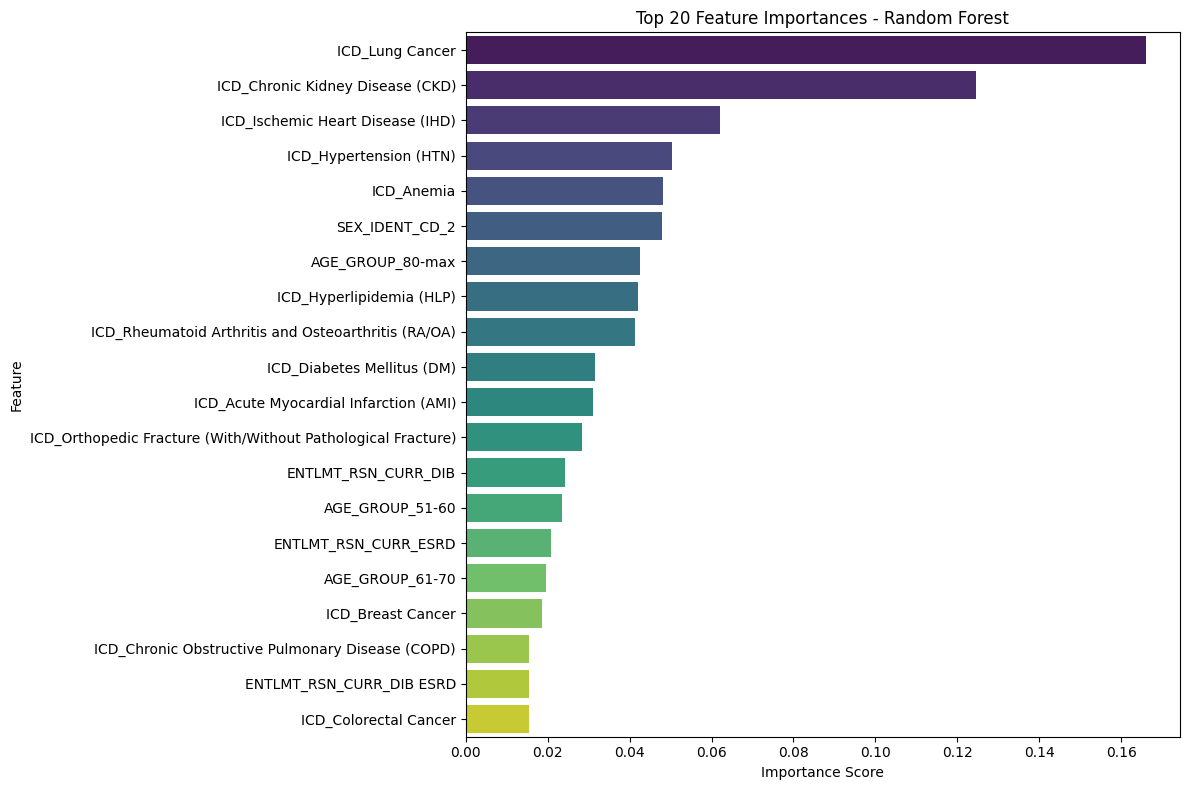

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


ICD_Lung Cancer:
patients diagnosed with lung cancer are strongly associated with ER visits
ICD_Chronic Kidney Disease (CKD): Strong predictor of ER visits.
CKD is linked to serious issues like electrolyte imbalances, fluid overload, or uremia that can result in ER admissions.
ICD_Ischemic Heart Disease (IHD):
Indicates that patients with IHD (e.g., coronary artery disease) are frequent ER users, likely due to chest pain, heart attacks, etc.